## Procesamiento y Clasificación de Datos

#### Tarea 1 Pre Procesamiento de Texto
#### Estudiante: Orestes Boffill Beltrán
#### Matrícula: 2085377
#### Maestría de Ciencia de Datos

## Librerías

In [1]:
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.stem import WordNetLemmatizer 
import codecs

## Carga del documento a analizar
#### El texto corresponde al libro "Adventures of Sherlock Holmes", el cual hemos descargado desde: https://www.gutenberg.org/ebooks/1661
#### Una vez descargado el documento, fue ubicado en una carpeta y eliminamos contenido superfluo, para analizar sólo la trama.
#### Realizamos en nuestro trabajo algunos pasos claves para analizar texto, a partir de lo orientado en clases apoyados en librerías de Python que nos permiten cargar y manipular los documentos.

In [2]:
carga = codecs.open("E:/MCD/Documentos/1661-0.txt", 'r', 'utf-8')
print('Done!')

Done!


## Lectura y presentación de contenido
#### Se utiliza la librería "BeautifulSoup" que minimiza el ruido cuando se realiza la lectura del texto.
#### Mostramos, a su vez, parte del contenido del libro tomando un intervalo al azar.

In [3]:
soup = BeautifulSoup(carga)

text = soup.get_text()
print(text[20000:25000])

range features which were
associated with the two crimes which I have already recorded, still,
the nature of the case and the exalted station of his client gave it a
character of its own. Indeed, apart from the nature of the
investigation which my friend had on hand, there was something in his
masterly grasp of a situation, and his keen, incisive reasoning, which
made it a pleasure to me to study his system of work, and to follow the
quick, subtle methods by which he disentangled the most inextricable
mysteries. So accustomed was I to his invariable success that the very
possibility of his failing had ceased to enter into my head.

It was close upon four before the door opened, and a drunken-looking
groom, ill-kempt and side-whiskered, with an inflamed face and
disreputable clothes, walked into the room. Accustomed as I was to my
friend’s amazing powers in the use of disguises, I had to look three
times before I was certain that it was indeed he. With a nod he
vanished into the bedroom

## Tokenización
#### Utilizamos la librería "nltk" para tokenizar, lo cual se realiza en el mismo orden en que iniciamos la lectura del documento.
#### Mostramos las 200 primeras palabras del documento.

In [4]:
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

tokens = tokenizer.tokenize(text)

print(tokens[:200])

['I', 'A', 'SCANDAL', 'IN', 'BOHEMIA', 'I', 'To', 'Sherlock', 'Holmes', 'she', 'is', 'always', '_the_', 'woman', 'I', 'have', 'seldom', 'heard', 'him', 'mention', 'her', 'under', 'any', 'other', 'name', 'In', 'his', 'eyes', 'she', 'eclipses', 'and', 'predominates', 'the', 'whole', 'of', 'her', 'sex', 'It', 'was', 'not', 'that', 'he', 'felt', 'any', 'emotion', 'akin', 'to', 'love', 'for', 'Irene', 'Adler', 'All', 'emotions', 'and', 'that', 'one', 'particularly', 'were', 'abhorrent', 'to', 'his', 'cold', 'precise', 'but', 'admirably', 'balanced', 'mind', 'He', 'was', 'I', 'take', 'it', 'the', 'most', 'perfect', 'reasoning', 'and', 'observing', 'machine', 'that', 'the', 'world', 'has', 'seen', 'but', 'as', 'a', 'lover', 'he', 'would', 'have', 'placed', 'himself', 'in', 'a', 'false', 'position', 'He', 'never', 'spoke', 'of', 'the', 'softer', 'passions', 'save', 'with', 'a', 'gibe', 'and', 'a', 'sneer', 'They', 'were', 'admirable', 'things', 'for', 'the', 'observer', 'excellent', 'for', 'dr

## Minúsculas
#### Transformamos todo el texto a minúsculas, lo cual se muestra a continuación para las mismas primeras 200 palabras.
#### El objetivo de este paso es evitar el conteo duplicado de palabras con las mismas letras (son diferentes para el intérprete las que incluyen mayúsculas).

In [5]:
words = [word.lower() for word in tokens]

print(words[:200])

['i', 'a', 'scandal', 'in', 'bohemia', 'i', 'to', 'sherlock', 'holmes', 'she', 'is', 'always', '_the_', 'woman', 'i', 'have', 'seldom', 'heard', 'him', 'mention', 'her', 'under', 'any', 'other', 'name', 'in', 'his', 'eyes', 'she', 'eclipses', 'and', 'predominates', 'the', 'whole', 'of', 'her', 'sex', 'it', 'was', 'not', 'that', 'he', 'felt', 'any', 'emotion', 'akin', 'to', 'love', 'for', 'irene', 'adler', 'all', 'emotions', 'and', 'that', 'one', 'particularly', 'were', 'abhorrent', 'to', 'his', 'cold', 'precise', 'but', 'admirably', 'balanced', 'mind', 'he', 'was', 'i', 'take', 'it', 'the', 'most', 'perfect', 'reasoning', 'and', 'observing', 'machine', 'that', 'the', 'world', 'has', 'seen', 'but', 'as', 'a', 'lover', 'he', 'would', 'have', 'placed', 'himself', 'in', 'a', 'false', 'position', 'he', 'never', 'spoke', 'of', 'the', 'softer', 'passions', 'save', 'with', 'a', 'gibe', 'and', 'a', 'sneer', 'they', 'were', 'admirable', 'things', 'for', 'the', 'observer', 'excellent', 'for', 'dr

## Stopwords
#### Carga de los stopwords, muestra de 200 de ellos.
#### Más adelante se retiran los mismos del texto para que no aparezcan en el conteo, pues no generan información relevante.

In [6]:
sw = nltk.corpus.stopwords.words('english')

print(sw[:200])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [7]:
words_ns = [word for word in words if word not in sw]

print(words_ns[:200])

['scandal', 'bohemia', 'sherlock', 'holmes', 'always', '_the_', 'woman', 'seldom', 'heard', 'mention', 'name', 'eyes', 'eclipses', 'predominates', 'whole', 'sex', 'felt', 'emotion', 'akin', 'love', 'irene', 'adler', 'emotions', 'one', 'particularly', 'abhorrent', 'cold', 'precise', 'admirably', 'balanced', 'mind', 'take', 'perfect', 'reasoning', 'observing', 'machine', 'world', 'seen', 'lover', 'would', 'placed', 'false', 'position', 'never', 'spoke', 'softer', 'passions', 'save', 'gibe', 'sneer', 'admirable', 'things', 'observer', 'excellent', 'drawing', 'veil', 'men', 'motives', 'actions', 'trained', 'reasoner', 'admit', 'intrusions', 'delicate', 'finely', 'adjusted', 'temperament', 'introduce', 'distracting', 'factor', 'might', 'throw', 'doubt', 'upon', 'mental', 'results', 'grit', 'sensitive', 'instrument', 'crack', 'one', 'high', 'power', 'lenses', 'would', 'disturbing', 'strong', 'emotion', 'nature', 'yet', 'one', 'woman', 'woman', 'late', 'irene', 'adler', 'dubious', 'questionab

## Lematización
#### El lema es la forma que por convenio se acepta como representante de todas las formas flexionadas de una misma palabra

In [8]:
lemmatizer = WordNetLemmatizer() 

## Gráfica
#### La gráfica muestra las 30 palabras de mayor frecuencia

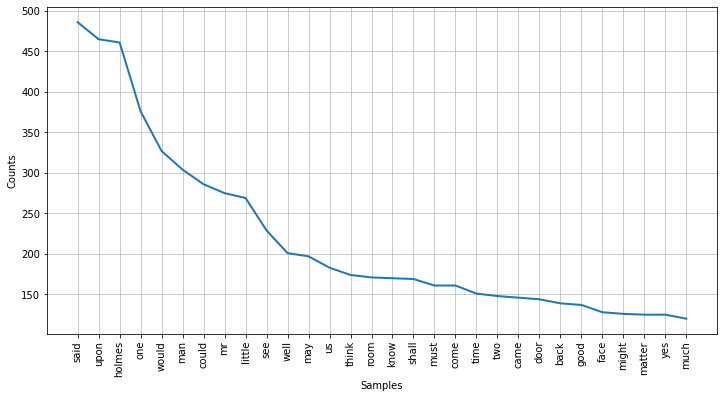

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [9]:
from matplotlib.pyplot import figure
%matplotlib inline

# Creating the word frequency distribution
freqdist = nltk.FreqDist(words_ns)

# Plotting the word frequency distribution
figure(figsize=(12,6))
freqdist.plot(30)

## Muestra de palabras
#### La figura recoge las palabras más frecuentes en todo el texto.

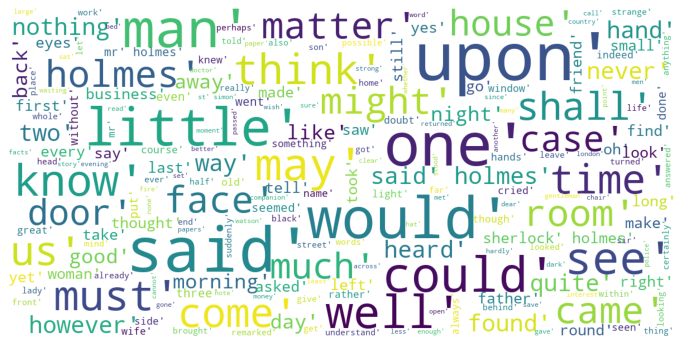

In [10]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(words_ns)

## Análisis de sentimientos

In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import sentiment
from nltk import word_tokenize

In [12]:
nltk.download('vader_lexicon')
analizador = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Maestro\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [13]:
sentences = words_ns[:200]
sentences

['scandal',
 'bohemia',
 'sherlock',
 'holmes',
 'always',
 '_the_',
 'woman',
 'seldom',
 'heard',
 'mention',
 'name',
 'eyes',
 'eclipses',
 'predominates',
 'whole',
 'sex',
 'felt',
 'emotion',
 'akin',
 'love',
 'irene',
 'adler',
 'emotions',
 'one',
 'particularly',
 'abhorrent',
 'cold',
 'precise',
 'admirably',
 'balanced',
 'mind',
 'take',
 'perfect',
 'reasoning',
 'observing',
 'machine',
 'world',
 'seen',
 'lover',
 'would',
 'placed',
 'false',
 'position',
 'never',
 'spoke',
 'softer',
 'passions',
 'save',
 'gibe',
 'sneer',
 'admirable',
 'things',
 'observer',
 'excellent',
 'drawing',
 'veil',
 'men',
 'motives',
 'actions',
 'trained',
 'reasoner',
 'admit',
 'intrusions',
 'delicate',
 'finely',
 'adjusted',
 'temperament',
 'introduce',
 'distracting',
 'factor',
 'might',
 'throw',
 'doubt',
 'upon',
 'mental',
 'results',
 'grit',
 'sensitive',
 'instrument',
 'crack',
 'one',
 'high',
 'power',
 'lenses',
 'would',
 'disturbing',
 'strong',
 'emotion',
 'n

In [14]:
for sentence in sentences:
    print(sentence)
    scores = analizador.polarity_scores(sentence)
    for key in scores:
        print(key, ': ', scores[key])
        print()

scandal
neg :  1.0

neu :  0.0

pos :  0.0

compound :  -0.4404

bohemia
neg :  0.0

neu :  1.0

pos :  0.0

compound :  0.0

sherlock
neg :  0.0

neu :  1.0

pos :  0.0

compound :  0.0

holmes
neg :  0.0

neu :  1.0

pos :  0.0

compound :  0.0

always
neg :  0.0

neu :  1.0

pos :  0.0

compound :  0.0

_the_
neg :  0.0

neu :  1.0

pos :  0.0

compound :  0.0

woman
neg :  0.0

neu :  1.0

pos :  0.0

compound :  0.0

seldom
neg :  0.0

neu :  1.0

pos :  0.0

compound :  0.0

heard
neg :  0.0

neu :  1.0

pos :  0.0

compound :  0.0

mention
neg :  0.0

neu :  1.0

pos :  0.0

compound :  0.0

name
neg :  0.0

neu :  1.0

pos :  0.0

compound :  0.0

eyes
neg :  0.0

neu :  1.0

pos :  0.0

compound :  0.0

eclipses
neg :  0.0

neu :  1.0

pos :  0.0

compound :  0.0

predominates
neg :  0.0

neu :  1.0

pos :  0.0

compound :  0.0

whole
neg :  0.0

neu :  1.0

pos :  0.0

compound :  0.0

sex
neg :  0.0

neu :  1.0

pos :  0.0

compound :  0.0

felt
neg :  0.0

neu :  1.0

pos :

neg :  0.0

neu :  1.0

pos :  0.0

compound :  0.0

clues
neg :  0.0

neu :  1.0

pos :  0.0

compound :  0.0

clearing
neg :  0.0

neu :  1.0

pos :  0.0

compound :  0.0

mysteries
neg :  0.0

neu :  1.0

pos :  0.0

compound :  0.0

abandoned
neg :  1.0

neu :  0.0

pos :  0.0

compound :  -0.4588

hopeless
neg :  1.0

neu :  0.0

pos :  0.0

compound :  -0.4588

official
neg :  0.0

neu :  1.0

pos :  0.0

compound :  0.0

police
neg :  0.0

neu :  1.0

pos :  0.0

compound :  0.0

time
neg :  0.0

neu :  1.0

pos :  0.0

compound :  0.0

time
neg :  0.0

neu :  1.0

pos :  0.0

compound :  0.0

heard
neg :  0.0

neu :  1.0

pos :  0.0

compound :  0.0

vague
neg :  1.0

neu :  0.0

pos :  0.0

compound :  -0.1027

account
neg :  0.0

neu :  1.0

pos :  0.0

compound :  0.0

doings
neg :  0.0

neu :  1.0

pos :  0.0

compound :  0.0

summons
neg :  0.0

neu :  1.0

pos :  0.0

compound :  0.0

odessa
neg :  0.0

neu :  1.0

pos :  0.0

compound :  0.0

case
neg :  0.0

neu :  1.0
